In [1]:
import networkx as nx
from networkx.generators.random_graphs import _random_subset
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


import time

save_graph = False

## Creazione del grafo

In [2]:
N = 50

G = nx.complete_graph(N)
G.remove_edges_from([(4, 0)])

Rappresentazione del grafico

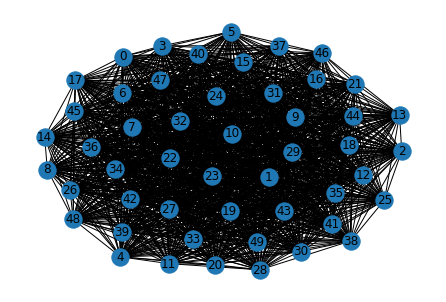

In [3]:
nx.draw(G, with_labels=True)    
plt.show()

if save_graph: 
    nx.write_adjlist(G, "CO.adjlist")

## Analisi del grafo

Estrazione della matrice di adiacenza A

In [4]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [5]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [6]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)

diff = [np.abs(autovaloriP[i] - 1) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriP[i] - 1) == minDiff:
        pS = autovettoriP[i]
        print("Eigenvector found")
        break

if pS[0] < 0:
    pS = -pS

Eigenvector found


In [7]:
autovaloriP

array([ 1.00000000e+00+0.00000000e+00j,  6.91668811e-18+0.00000000e+00j,
       -4.08163265e-02+0.00000000e+00j, -2.04081633e-02+1.33810052e-17j,
       -2.04081633e-02-1.33810052e-17j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633e-02+0.00000000e+00j,
       -2.04081633e-02+0.00000000e+00j, -2.04081633

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [8]:
matrixL = np.identity(N) - matrixP

In [9]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)

diff = [np.abs(autovaloriL[i]) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriL[i]) == minDiff:
        pS_L = autovettoriL[i]
        FiedlerEigenvalues = list(autovaloriL)
        FiedlerEigenvalues.remove(autovaloriL[i])
        print("Eigenvector found")
        break

if pS_L[0] < 0:
    pS_L = -pS_L

Eigenvector found


In [10]:
autovaloriL

array([-1.11022302e-16,  1.00000000e+00,  1.04081633e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00,  1.02040816e+00,  1.02040816e+00,
        1.02040816e+00,  1.02040816e+00])

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [11]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
np.round(1-max(autovaloriP[1:]), i) == np.round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [13]:
FiedlerValue = round(min(FiedlerEigenvalues), i)
print(FiedlerValue)

1.0


In [14]:
pS = np.round(pS.real, i)
print(pS)

[0.13864728 0.14153576 0.14153576 0.14153576 0.13864728 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576 0.14153576
 0.14153576 0.14153576]


In [15]:
if save_graph: 
    np.savetxt("CO-pS.txt", pS, delimiter='\n')

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui può essere fatta secondo una distribuzione uniforme oppure concentrando tutti gli indivisui in un punto.

## Dinamica sul grafo

In [16]:
walker_per_node = 1000

start_node = 2
walkers = int(1e3)

In [17]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [18]:
history = [[], [], []]
for h in range(len(history)):
#     history[h] = [[walker_per_node] * len(G.nodes)]
    history[h] = [[0] * len(G.nodes)]
    history[h][0][start_node] = walkers

In [19]:
time_steps = int(5e2)

In [ ]:
t0 = time.time()

for h in range(len(history)):
    for n in G.nodes:
#         G.nodes[n]['N_i'] = walker_per_node
        G.nodes[n]['N_i'] = 0
    G.nodes[start_node]['N_i'] = walkers
    
    for t in range(time_steps):
        dynamic_evolution(G, history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.5*N, 10))

pSExpected = [d for n, d in G.degree()]
pSNorm = [h/sum(pS) for h in pS]

total_walkers = sum(history[0][0])

hMean = [[(h1+h2+h3)/total_walkers/3 
          for h1, h2, h3 in zip(history[0][i], history[1][i], history[2][i])] 
         for i in range(len(history[0]))]

ax[0].bar(G.nodes, [h/sum(pSExpected) for h in pSExpected], width=0.4, align='edge', color='blue', label="expected value")
ax[0].bar(G.nodes, [h for h in pSNorm], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

ax[1].bar(G.nodes, [h/sum(history[0][-1]) for h in history[0][-1]], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax[1].bar(G.nodes, hMean[-1], width=0.2, align='edge', color='red', label='mean relaxed distribution')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)


plt.show()

In [ ]:
print(pSNorm)

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.3*N, 5))

ax.bar(G.nodes, [h/sum(history[0][-1]) - k for h, k in zip(history[0][-1], pSNorm)], width=0.4, 
       align='edge', color='orange', label='relaxed distribution')
ax.bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1])) - k 
                 for h1, h2, h3, k in zip(history[0][-1], history[1][-1], history[2][-1], pSNorm)],
       width=0.2, align='edge', color='red', label='mean relaxed distribution')

ax.legend()
ax.set_xlabel("Nodes")
ax.set_ylabel("Occupation difference(%)")
ax.set_xticks(np.arange(0, N, 1))
# ax.grid(True)

plt.show()

In [ ]:
nodes = [0, start_node]

In [ ]:
def exp_law(x, a, b, c):
    return a*np.exp(-b*x) + c

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6,4))

time_evolution = [[h1/total_walkers for h1 in history[0][i]] for i in range(len(history[0]))]
time = np.arange(0, 50)

y = [sum([np.abs(time_evolution[t][n] - pSNorm[n]) for n in G.nodes]) for t in time]

popt, pcov = curve_fit(exp_law, time, y, p0=[1, FiedlerValue, 0]) 

ax.plot(time, y, '.')
ax.plot(time, exp_law(time, *popt), '-',
           label = f"fit: a={round(popt[0],4)}, b={round(popt[1],4)}, c={round(popt[2],4)}")
ax.plot(time, exp_law(time, popt[0], FiedlerValue, popt[2]), '-',
           label = f"Expected fit with b = {round(FiedlerValue, 4)}")

ax.set_title(f"Distribution of ...")
ax.set_xlabel("Time steps")
ax.set_ylabel("Walkers per node")

plt.yscale('log')
ax.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,1.5*len(nodes)))
color = ['red', 'orange', 'blue', 'green']

time_evolution = hMean
time = np.arange(0, len(time_evolution), 2)

col = 0
for i in nodes: #list(G.nodes)[0:3]:
    ax.plot(time, [time_evolution[ind][i] for ind in time], label = f"Node {i}", color = color[col])
    ax.plot(time, [pSNorm[i]]*len(time), label = f"Relaxed distribution of node {i}", color = color[col])
    col += 1
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Density of walkers per node")
ax.legend()

plt.show()

print(f"Evolution of {time_steps} time steps for {total_walkers} walkers")